## Importing Libraries

In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts
import seaborn as sns #used for data Visualization
import matplotlib.pyplot as plt
import missingno as msno #finding missing values
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error#model performance
import pickle #Python object hierarchy is converted into a byte stream,
from sklearn.linear_model import LinearRegression #Regresssion ML algorithm

## Uploading Dataset

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Desktop\CO2-Emission-of-Cars-main\Dataset\Sample.csv") #loading the csv data

In [3]:
data.head() #return you the first 5 rows values

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [4]:
data.tail() #return you the last 5 rows values

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
674,2001,VOLVO,V70 T5 WAGON TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,9.3,11.3,25,260
675,2001,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,2.4,5,A5,Z,12.8,9.3,11.2,25,258
676,2001,VOLVO,V70 WAGON,STATION WAGON - MID-SIZE,2.4,5,M5,Z,12.5,9.3,11.0,26,253
677,2001,VOLVO,V70 WAGON AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,AS5,Z,14.4,10.3,12.5,23,288
678,2001,VOLVO,V70 XC AWD TURBO,SUV,2.4,5,AS5,Z,14.8,11.4,13.3,21,306


In [5]:
data.head(8) #return you the top 8 rows values

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301
5,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,8.5,10.1,28,232
6,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,10.6,8.3,9.6,29,221
7,2001,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.5,9.7,29,223


In [6]:
data.drop('MODEL',axis=1,inplace=True)  # drop is used for dropping the column

### Renaming column names

In [7]:
data.columns #return all the column names

Index(['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2_EMISSIONS'],
      dtype='object')

In [8]:
data.columns=['Make','MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)','CO2_Emissions'] # manually giving the name  of the columns
data.columns

Index(['Make', 'MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'],
      dtype='object')

### Info of the data

In [9]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             679 non-null    object 
 1   MODEL.1                          679 non-null    object 
 2   Vehicle_Class                    679 non-null    object 
 3   Engine_Size                      679 non-null    float64
 4   Cylinders                        679 non-null    int64  
 5   Transmission                     679 non-null    object 
 6   Fuel_Type                        679 non-null    object 
 7   Fuel_Consumption_City            679 non-null    float64
 8   Fuel_Consumption_Hwy             679 non-null    float64
 9   Fuel_Consumption_Comb(L/100 km)  679 non-null    float64
 10  Fuel_Consumption_Comb(mpg)       679 non-null    int64  
 11  CO2_Emissions                    679 non-null    int64  
dtypes: float64(4), int64(3

In [10]:
data.describe()  # returns important values for continous column data

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,3.252577,5.798233,14.591900,10.613844,12.802798,23.107511,293.656848
std,1.203751,1.531073,3.025654,2.357724,2.685590,5.308083,60.372456
min,1.000000,3.000000,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2.200000,4.000000,12.700000,9.000000,11.000000,19.000000,253.000000
50%,3.000000,6.000000,14.300000,10.100000,12.300000,23.000000,283.000000
75%,4.200000,6.000000,16.650000,12.500000,14.850000,26.000000,340.000000
max,8.000000,12.000000,23.200000,18.000000,20.800000,63.000000,478.000000


## Seeing Target, Nominal and Numerical Columns Count

In [11]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

## Categoical Columns

In [12]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['Make', 'MODEL.1', 'Vehicle_Class', 'Transmission', 'Fuel_Type'],
      dtype=object)

### Analysing the categorical columns

In [13]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : Make
count of classes :  34
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
************************************************************************************************************************
Column : MODEL.1
count of classes :  351
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERADO': 5, 'K1500 SILVERADO 4X4': 5, 'F150': 5, 'F150 4X4': 5, 'C1500 SIERRA': 5, 'A4 QUATTRO': 4, 'A6 QUATTRO': 4, 'Z3': 4, 'CAMARO': 4, 'CAVALIER': 4, 'S10 FFV': 4, 'INTREPID': 4, 'SEBRING COUPE': 4, 'LANOS': 4, 'MUST

In [14]:
#here we are combininng the similar types of class into one class using where is for find
#and isin is for used for checking purpose
data["Transmission"] = np.where(data["Transmission"].
                            isin(["A4", "A5", "A3"]), "Automatic", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].isin(["M5", "M6"]), "Manual", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].
                        isin(["AS4", "AS5"]), "Automatic with Select Shift", data["Transmission"])
data["Transmission"] = np.where(data["Transmission"].
                isin(["AV"]), "Continuously Variable", data["Transmission"])
c(data['Transmission'])

Counter({'Automatic': 425,
         'Manual': 224,
         'Automatic with Select Shift': 29,
         'Continuously Variable': 1})

In [15]:
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="Z", "Premium Gasoline", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="X", "Regular Gasoline", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="D", "Diesel", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="E", "Ethanol(E85)", data["Fuel_Type"])
data["Fuel_Type"] = np.where(data["Fuel_Type"]=="N", "Natural Gas", data["Fuel_Type"])
c(data["Fuel_Type"])

Counter({'Regular Gasoline': 442,
         'Premium Gasoline': 223,
         'Ethanol(E85)': 4,
         'Natural Gas': 4,
         'Diesel': 6})

## Numerical Columns

In [16]:
data.dtypes[data.dtypes!='O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions'], dtype=object)

## Checking Null values

In [17]:
data.isnull().any()#it will return true if any columns is having null values

Make                               False
MODEL.1                            False
Vehicle_Class                      False
Engine_Size                        False
Cylinders                          False
Transmission                       False
Fuel_Type                          False
Fuel_Consumption_City              False
Fuel_Consumption_Hwy               False
Fuel_Consumption_Comb(L/100 km)    False
Fuel_Consumption_Comb(mpg)         False
CO2_Emissions                      False
dtype: bool

In [18]:
data.isnull().sum() #used for finding the null values

Make                               0
MODEL.1                            0
Vehicle_Class                      0
Engine_Size                        0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption_City              0
Fuel_Consumption_Hwy               0
Fuel_Consumption_Comb(L/100 km)    0
Fuel_Consumption_Comb(mpg)         0
CO2_Emissions                      0
dtype: int64

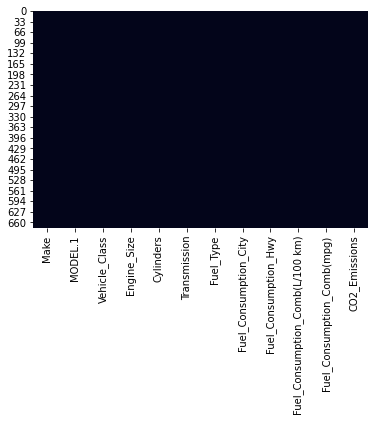

In [19]:
sns.heatmap(data.isnull(),cbar=False)

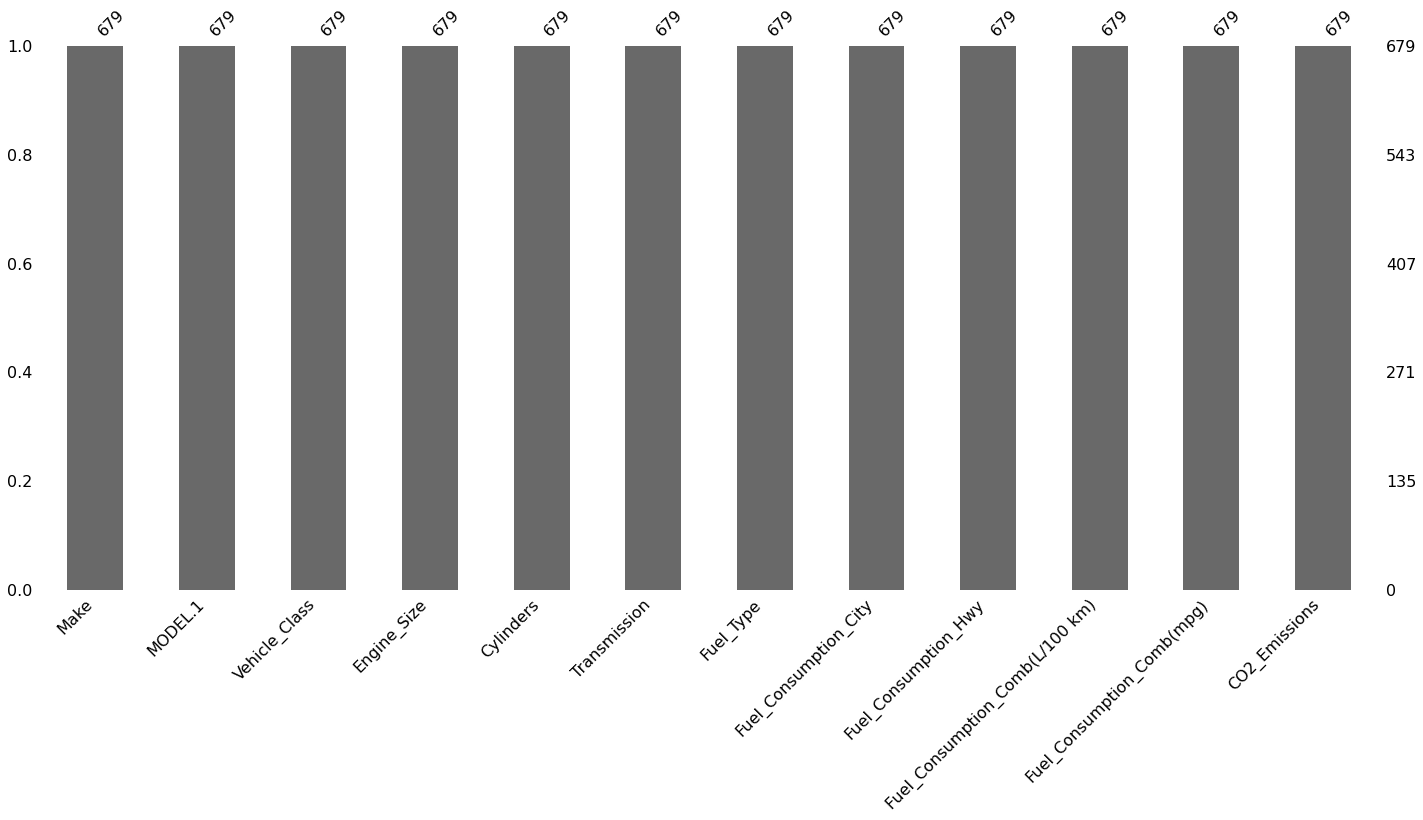

In [20]:
msno.bar(data)
plt.show()

## Labeling the Categorical Columns

In [21]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: Make
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
Counter({9: 63, 5: 60, 8: 47, 2: 43, 10: 41, 31: 36, 32: 35, 21: 29, 6: 25, 1: 24, 20: 24, 33: 24, 22: 23, 25: 19, 27: 15, 28: 15, 30: 15, 11: 14, 29: 13, 12: 12, 0: 11, 7: 10, 15: 10, 17: 10, 26: 10, 16: 9, 18: 8, 19: 7, 23: 7, 3: 6, 13: 5, 4: 4, 14: 4, 24: 1})
****************************************************************************************************
LABEL ENCODING OF: MODEL.1
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERA

## Data Visualization

In [23]:
from tabulate import tabulate  # used for make data in a tabulated form
print(tabulate(pd.DataFrame(data1.Make.value_counts())))

-------------  --
FORD           63
CHEVROLET      60
DODGE          47
BMW            43
GMC            41
TOYOTA         36
VOLKSWAGEN     35
MERCEDES-BENZ  29
CHRYSLER       25
MAZDA          24
AUDI           24
VOLVO          24
NISSAN         23
PONTIAC        19
SATURN         15
SAAB           15
SUZUKI         15
HONDA          14
SUBARU         13
HYUNDAI        12
ACURA          11
JAGUAR         10
PORSCHE        10
DAEWOO         10
KIA            10
JEEP            9
LEXUS           8
OLDSMOBILE      7
LINCOLN         7
BUICK           6
INFINITI        5
ISUZU           4
CADILLAC        4
PLYMOUTH        1
-------------  --


## Feature:Make

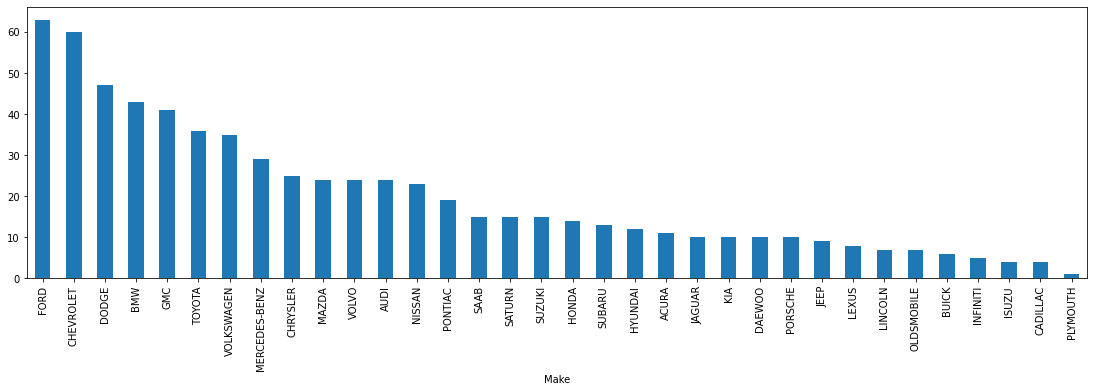

In [24]:
plt.figure(figsize=(19,5)); # give the figure size as width=19 and height = 5
#grouping Make with its count to find the top class 
data1.groupby("Make")["Make"].count().sort_values(ascending=False).plot(kind="bar")


## Feature:MODEL.1

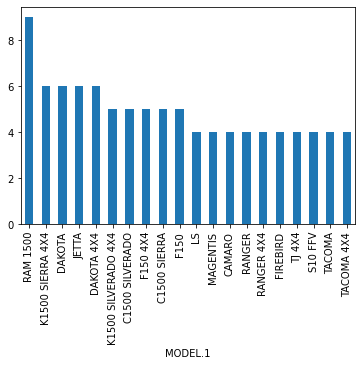

In [25]:
data1.groupby("MODEL.1")["MODEL.1"].count().sort_values(ascending=False)[:20].plot(kind="bar")

## Feature:Vehicle_Class

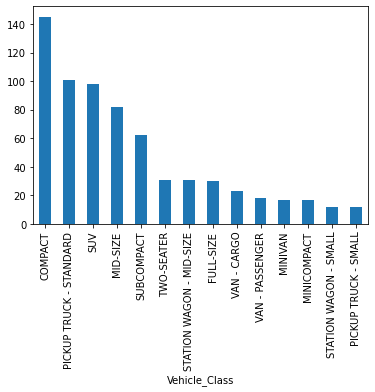

In [26]:
data1.groupby('Vehicle_Class')['Vehicle_Class'].count().sort_values(ascending=False).plot(kind="bar")

## Feature:Transmission

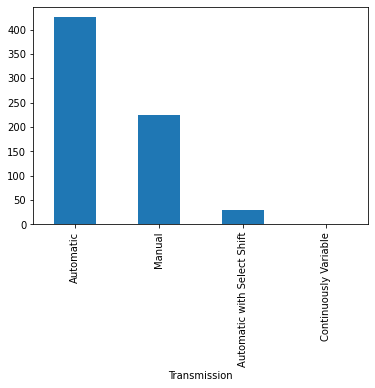

In [27]:
data1.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar')

## Feature:Fule_Type

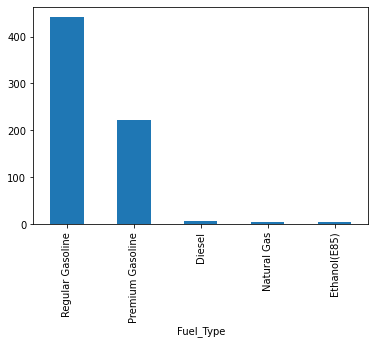

In [28]:
data1.groupby('Fuel_Type')["Fuel_Type"].count().sort_values(ascending=False).plot(kind='bar')

## Make vc CO2_Emissions

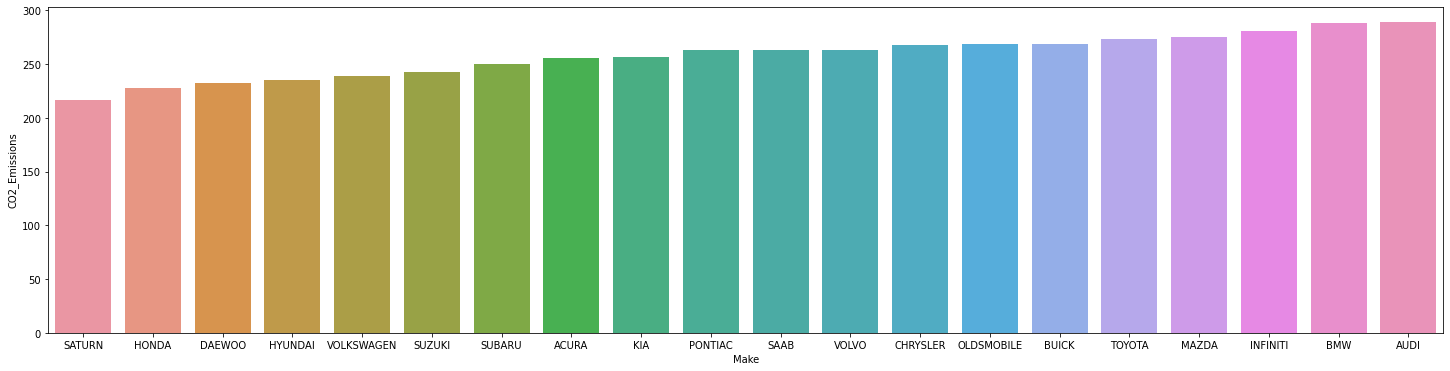

In [29]:
#grouping the Make and CO2_Emissions cloumns and storing top 20 classes.
MCO2=data1.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()

plt.figure(figsize=(25,6))
#plotting the barplot between Make and CO2_Emissions column
sns.barplot(x = "Make",y="CO2_Emissions",data =MCO2 )

## Vehicle_CLass vs CO2_Emissions

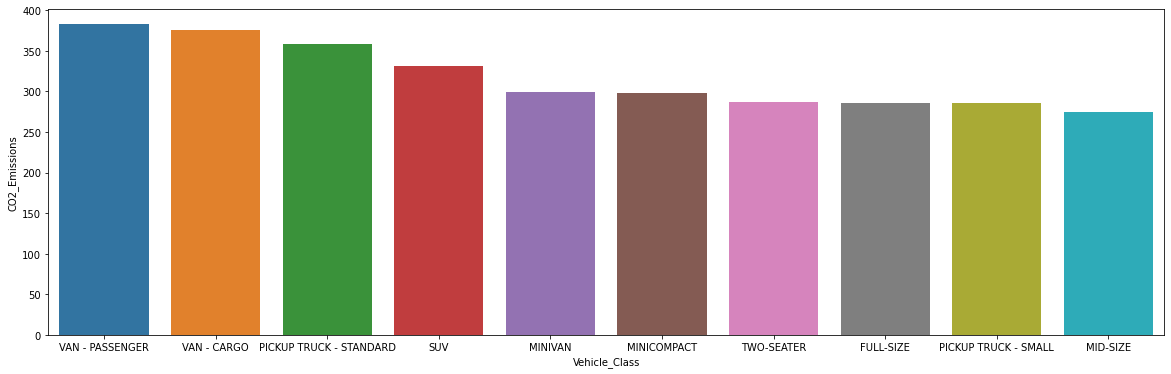

In [40]:
VC = data1.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Vehicle_Class',y='CO2_Emissions',data=VC)

## Transmission vs CO2_Emissions

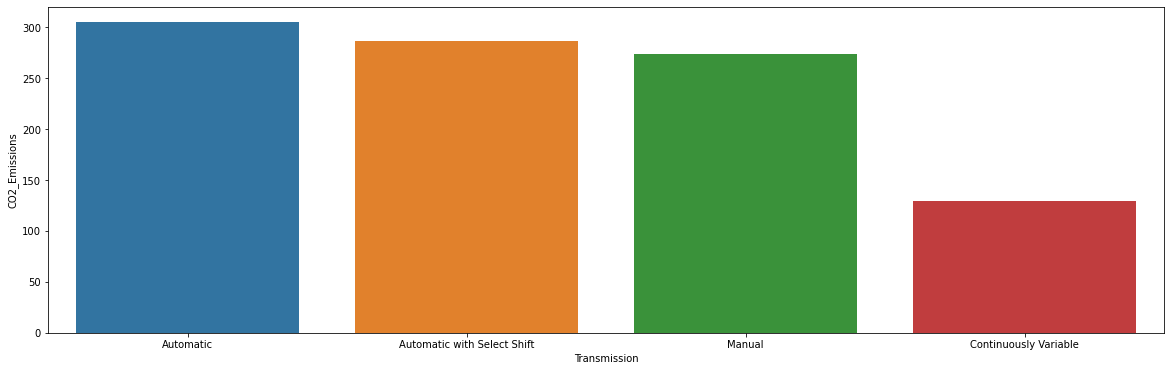

In [42]:
TC=data1.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Transmission',y='CO2_Emissions',data=TC)

## Fule_Type vs CO2_Emission

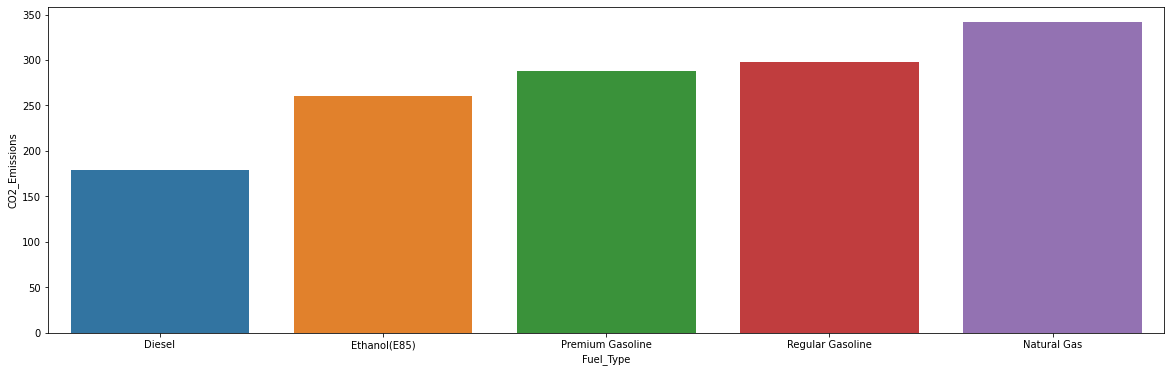

In [43]:
FC=data1.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values()[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x='Fuel_Type',y='CO2_Emissions',data=FC)

## Correlation

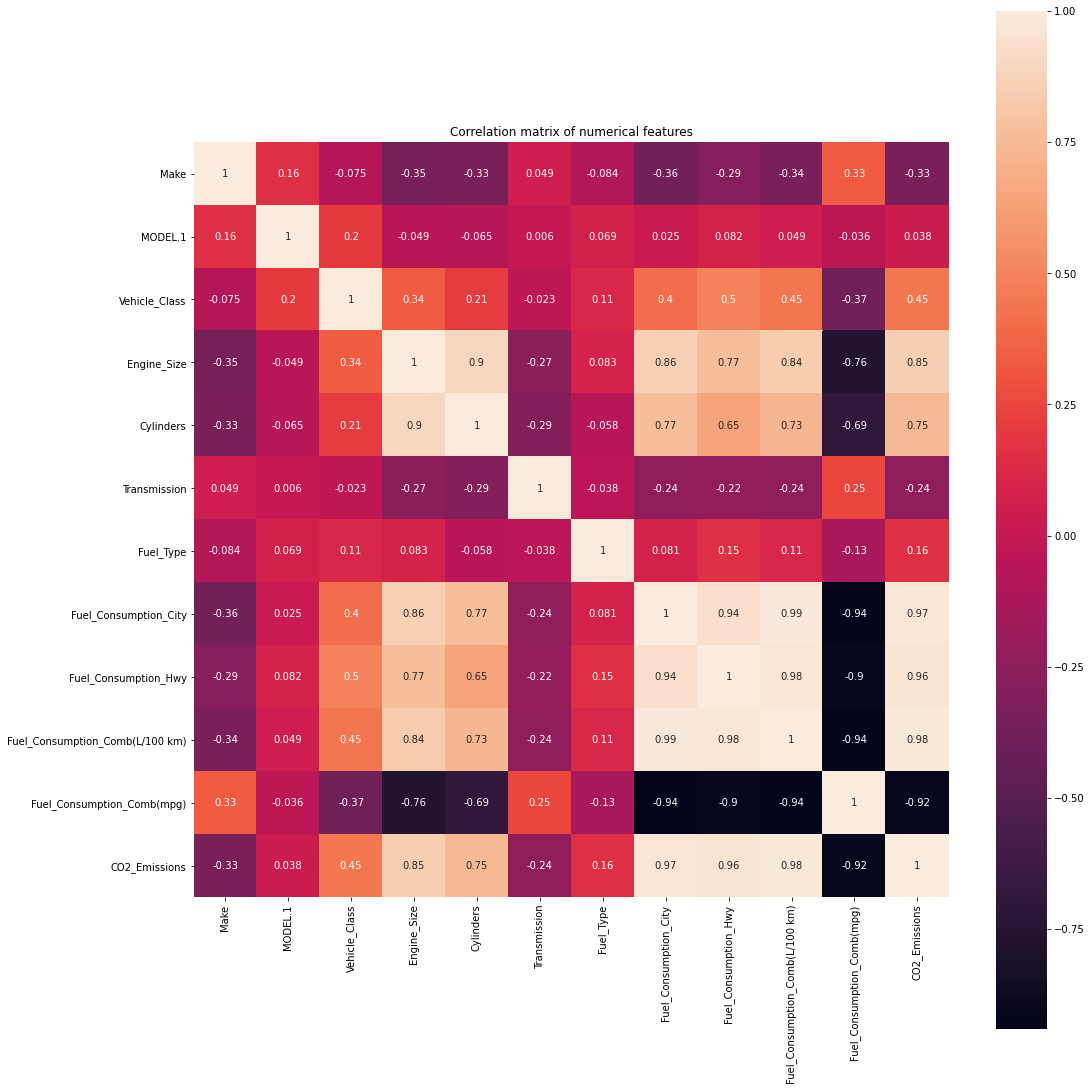

In [44]:
corr = data.corr() #perform correlation between all continous features
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) #plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

## Correlation of independent features with dependent variable

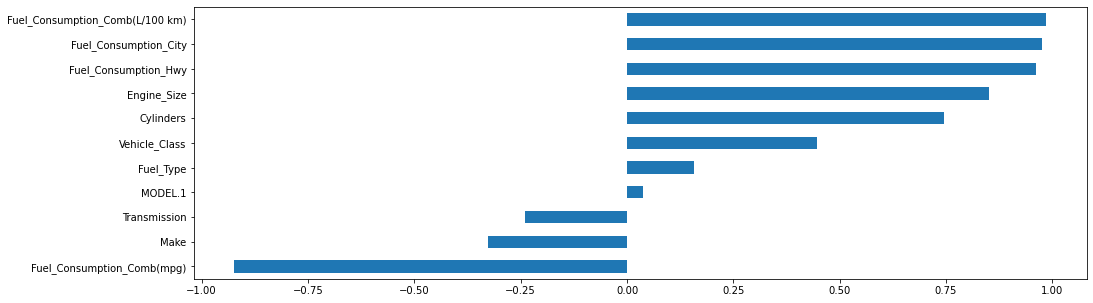

In [45]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

## Creating the Dependent and Independent variable

In [46]:
x = data.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100 km)','MODEL.1'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['CO2_Emissions'] #depenent feature
y=pd.DataFrame(y)

## Splitting dataset into train and test

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)


(543, 9)
(136, 9)


## Building our Model

In [48]:
lr=LinearRegression() #creating object of LinearRegression model
lr=lr.fit(x_train,y_train) # fitting our model

## Predecting the results

In [49]:
y_pred=lr.predict(x_test)
y_pred

array([[354.85171194],
       [268.4531707 ],
       [297.60466559],
       [193.3382349 ],
       [341.50860242],
       [343.92395653],
       [222.27378841],
       [294.07573247],
       [263.1368257 ],
       [209.03213488],
       [285.54329257],
       [277.82183883],
       [287.76554147],
       [428.15918777],
       [217.86410296],
       [343.0229313 ],
       [339.376677  ],
       [347.35915488],
       [232.63908778],
       [336.53765593],
       [256.38284942],
       [365.34981444],
       [348.4734845 ],
       [369.40493529],
       [240.17803987],
       [160.19361701],
       [266.35988375],
       [192.76228697],
       [298.09905274],
       [309.2563186 ],
       [389.16961768],
       [260.23251057],
       [263.66960713],
       [279.69974172],
       [282.36328082],
       [235.88174772],
       [269.37956017],
       [235.80954707],
       [397.71787918],
       [321.76032239],
       [297.18887096],
       [280.38247127],
       [199.73208844],
       [268

## Checking the score of our model

In [50]:
score = lr.score(x_test,y_test)
score

0.9262052609242846

In [51]:
from sklearn import metrics #importing the metrics library
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) #Mean Absolute Error
print("MSE:",metrics.mean_squared_error(y_test,y_pred)) # Mean Square Error
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # Root Mean Square Error

MAE: 5.327868570518991
MSE: 260.82431344914227
RMSE: 16.150056143838704


## Dumping our model

In [52]:
pickle.dump(lr,open("CO2.pkl",'wb'))